In [56]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

## Read file from path

In [57]:
raw = pd.read_csv("Index2018.csv")
df_comp = raw.copy()
df_comp.date = pd.to_datetime(raw.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method="ffill")

In [58]:
df_comp['market_value'] = df_comp.ftse

In [59]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## Calculate Returns

In [60]:
df['returns'] = df['market_value'].pct_change(1)

<ipython-input-60-c327943c3c15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['market_value'].pct_change(1)


In [61]:
df['norm_returns'] = df['returns'].div(df['returns'].iloc[1])

<ipython-input-61-946fbf27dbf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_returns'] = df['returns'].div(df['returns'].iloc[1])


## Model with MA

### ACF and PACF Analysis

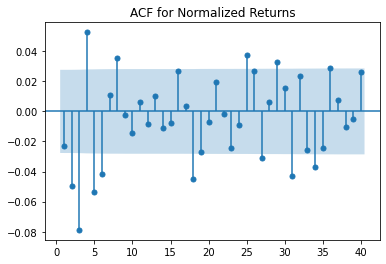

In [62]:
sgt.plot_acf(df.norm_returns.dropna(),zero=False, lags=40)
plt.title("ACF for Normalized Returns")
plt.show()

### Model with MA(8)

In [63]:
model_MA_8 = ARIMA(df.norm_returns, order=(0,0,8))
result_MA_8 = model_MA_8.fit()
result_MA_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           norm_returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -17189.643
Date:                Mon, 23 Nov 2020   AIC                          34399.286
Time:                        21:52:22   BIC                          34464.499
Sample:                    01-07-1994   HQIC                         34422.137
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1204      0.096     -1.252      0.211      -0.309       0.068
ma.L1         -0.0238      0.009     -2.527      0.012      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.000      -0.066      -0.033
ma.L3         -0.0847      0.008    -10.310      0.000      -0.101      -0.069
ma.L4          0.0488      0.009      5.614      0.000       0.032       0.066
ma.L5         -0.0518      0.008     -6.304      0.000      -0.068      -0.036
ma.L6         -0.0402      0.009     -4.410      0.000      -0.058      -0.022
ma.L7          0.0084      0.009      0.938      0.348      -0.009       0.026
ma.L8          0.0365      0.009      3.881      0.000       0.018       0.055
sigma2        55.1781      0.604     91.304      0.000      53.994      56.363
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6445.64
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

It seems that the results we get are similar to what we have using non-normalized returns. Let us see if we are getting the same result for MA(6) using normalized returns.

## Modelling with MA(6)

In [64]:
model_MA_6 = ARIMA(df.norm_returns,order=(0,0,6))
result_MA_6 = model_MA_6.fit()
result_MA_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           norm_returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -17193.261
Date:                Mon, 23 Nov 2020   AIC                          34402.523
Time:                        21:52:24   BIC                          34454.694
Sample:                    01-07-1994   HQIC                         34420.804
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1206      0.092     -1.316      0.188      -0.300       0.059
ma.L1         -0.0237      0.009     -2.561      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.000      -0.064      -0.033
ma.L3         -0.0827      0.008    -10.179      0.000      -0.099      -0.067
ma.L4          0.0466      0.009      5.387      0.000       0.030       0.064
ma.L5         -0.0484      0.008     -5.989      0.000      -0.064      -0.033
ma.L6         -0.0387      0.009     -4.319      0.000      -0.056      -0.021
sigma2        55.2566      0.599     92.180      0.000      54.082      56.431
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6539.14
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Is MA(8) better than MA(6)? Let us find out with LLR Test

In [65]:
def LLR_Test(model_1, model_2, DF=1):
    llh_1 = model_1.fit().llf
    llh_2 = model_2.fit().llf
    diff = (2*(llh_2 - llh_1))
    p = chi2.sf(diff, df=DF)
    return p

In [66]:
LLR_Test(model_MA_6, model_MA_8, DF=2)

0.02682288976867831

p value is 0.027, which means that MA(8) is significantly better than MA(6)

## Residual Analysis for MA(8)

In [67]:
MA_8_residuals = result_MA_8.resid

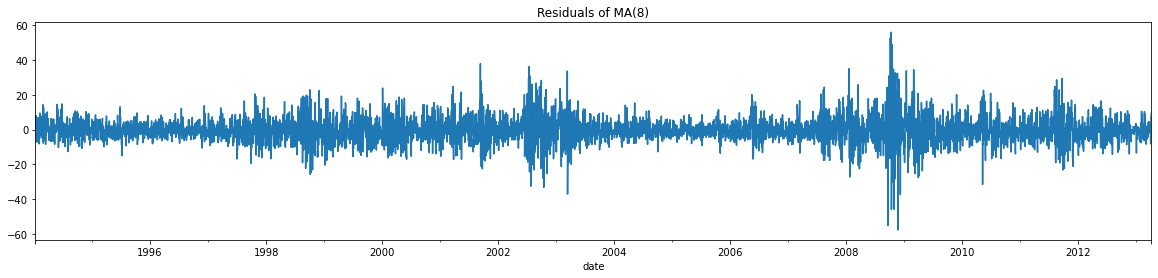

In [68]:
MA_8_residuals.plot(figsize=(20,4))
plt.title("Residuals of MA(8)")
plt.show()

In [69]:
print(f"Mean of residuals for MA(8) is {MA_8_residuals.mean()}")
print(f"Std Dev of residuals for MA(8) is {np.sqrt(MA_8_residuals.var())}")

Mean of residuals for MA(8) is 0.00012314203326931219
Std Dev of residuals for MA(8) is 7.428984459225109


In [74]:
sts.adfuller(MA_8_residuals.dropna())

(-70.83788946104745,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 34175.63847174012)

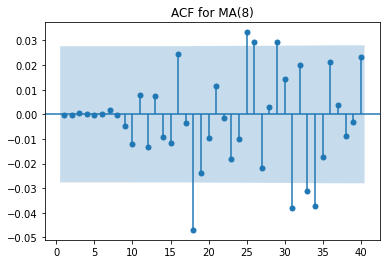

In [78]:
sgt.plot_acf(MA_8_residuals.dropna(), zero=False, lags=40)
plt.title("ACF for MA(8)")
plt.show()